In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

from utils.exploratory import zip_dtype

In [2]:
plt.rcParams['figure.figsize'] = [24, 18]

### Correlações - Escolas

In [3]:
escolas = pd.DataFrame()
escolas_path = os.path.relpath('../data/escolas')

escolas_files = [x for x in os.walk(escolas_path)][0][2]
for file in escolas_files:
    if not 'escolas' in file:
        continue
    escolas = escolas.append(pd.read_csv(os.path.join(escolas_path, file),
                                         dtype=zip_dtype('../schemas/escolas_schema.json')).sample(frac=0.05))

/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,59,61,63,64,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,98,99,102,104,105,107,108,113,121,124,125,126,127,128,129,130,136,152,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,124,125,126,127,128,129,130,136,152,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,152,155,191) have mixed types. 

In [4]:
escolas.head()

Unnamed: 0 ano_censo cod_escola_inep    regiao unidade_federativa  \
82014        82014      2017        35468332   Sudeste          São Paulo   
91676        91676      2017        43004202       Sul  Rio Grande do Sul   
113521      113521      2017        43196667       Sul  Rio Grande do Sul   
246976      246976      2017        29096790  Nordeste              Bahia   
210584      210584      2017        21237042  Nordeste           Maranhão   

                           mesoregiao          microregiao         municipio  \
82014    Macro Metropolitana Paulista              Jundiaí   Várzea Paulista   
91676   Metropolitana de Porto Alegre         Porto Alegre      Porto Alegre   
113521         Sudoeste Rio-grandense  Campanha Meridional              Bagé   
246976            Centro Norte Baiano     Feira de Santana  Feira de Santana   
210584               Oeste Maranhense               Gurupi        Turilândia   

       tp_dependencia tp_dependencia_desc     ...       \
82014               4             Privada     ...        
91676               4             Privada     ...        
113521              4             Privada     ...        
246976              3           Municipal     ...        
210584              3           Municipal     ...        

       tp_indigena_lingua_desc co_lingua_indigena in_brasil_alfabetizado  \
82014                      NaN                NaN                  False   
91676                      NaN                NaN                  False   
113521                     NaN                NaN                  False   
246976                     NaN                NaN                  False   
210584                     NaN                NaN                  False   

       in_final_semana in_formacao_alternancia cod_municipio  \
82014            False                   False       3556503   
91676            False                   False       4314902   
113521           False                   False       4301602   
246976           False                   False       2910800   
210584            True                   False       2112456   

       num_matriculas_ensino_integral  num_estudantes_ensino_integral  \
82014                             NaN                             NaN   
91676                             NaN                             NaN   
113521                            NaN                             NaN   
246976                            NaN                             NaN   
210584                            NaN                             NaN   

        tp_integral  cod_ibge_uf  
82014         False           35  
91676         False           43  
113521        False           43  
246976        False           29  
210584        False           21  

[5 rows x 203 columns]

Text(0.5,1,'Clustering hierárquico de variáveis das escolas')

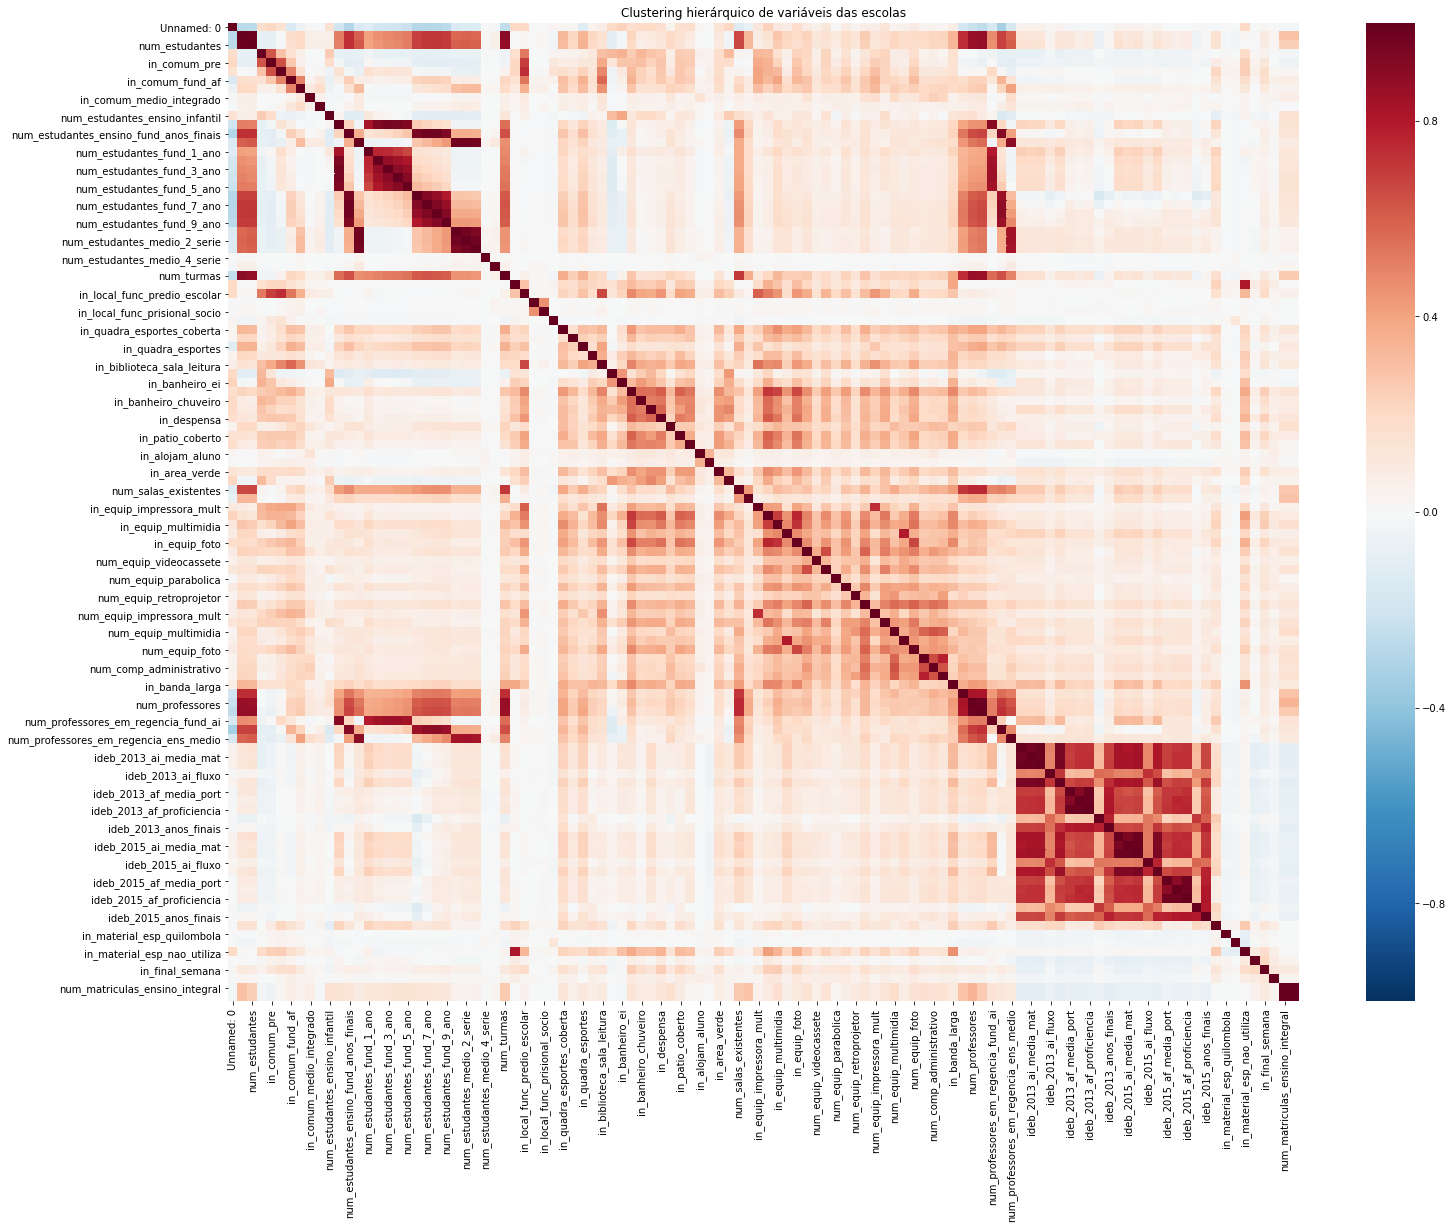

In [5]:
corr = escolas.iloc[:, ((escolas.dtypes != 'string') & (escolas.dtypes != 'object')).values].corr()
corr = corr.fillna(0.0)
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis das escolas")

### IDEB - Anos Iniciais

In [6]:
ideb_anos_iniciais = pd.read_csv('../data/ideb/ideb_escolas_anosiniciais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_iniciais['Cod_Escola_Completo'] = ideb_anos_iniciais['Cod_Escola_Completo'].astype('int')

/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (64,65,67,68,70,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
ideb_anos_iniciais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio  Cod_Escola_Completo  \
0    RO               1100015.0  Alta Floresta D'Oeste             11024666   
1    RO               1100015.0  Alta Floresta D'Oeste             11024682   
2    RO               1100015.0  Alta Floresta D'Oeste             11024828   
3    RO               1100015.0  Alta Floresta D'Oeste             11024968   
4    RO               1100015.0  Alta Floresta D'Oeste             11025077   

                              Nome_Escola       Rede  \
0                    EMEIEF BOA ESPERANCA  Municipal   
1             EEEF EURIDICE LOPES PEDROSO   Estadual   
2                  EMEIEF IZIDORO STEDILE  Municipal   
3  EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA   Estadual   
4              EMEIEF MARIA DE SOUZA PEGO  Municipal   

   TaxaAprovacao2005_1ao5ano  TaxaAprovacao2005_1ano  TaxaAprovacao2005_2ano  \
0                        NaN                     NaN                     NaN   
1                       93.1                     NaN                   100.0   
2                        NaN                     NaN                     NaN   
3                       89.4                     NaN                   100.0   
4                        NaN                     NaN                     NaN   

   TaxaAprovacao2005_3ano        ...         Ideb2015  Ideb2017  \
0                     NaN        ...              5.4       5.6   
1                    93.7        ...              5.8       6.9   
2                     NaN        ...              5.0       4.9   
3                    82.9        ...              5.9       NaN   
4                     NaN        ...              NaN       4.6   

   ProjecaoIdeb2007  ProjecaoIdeb2009  ProjecaoIdeb2011  ProjecaoIdeb2013  \
0               NaN               NaN               NaN               NaN   
1               4.2               4.6               5.0               5.3   
2               NaN               NaN               3.2               3.5   
3               4.5               4.9               5.3               5.5   
4               NaN               NaN               NaN               NaN   

   ProjecaoIdeb2015  ProjecaoIdeb2017  ProjecaoIdeb2019  ProjecaoIdeb2021  
0               NaN               5.6               5.9               6.1  
1               5.5               5.8               6.1               6.3  
2               3.8               4.1               4.4               4.7  
3               5.8               6.1               6.3               6.6  
4               NaN               NaN               4.9               5.2  

[5 rows x 91 columns]

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')

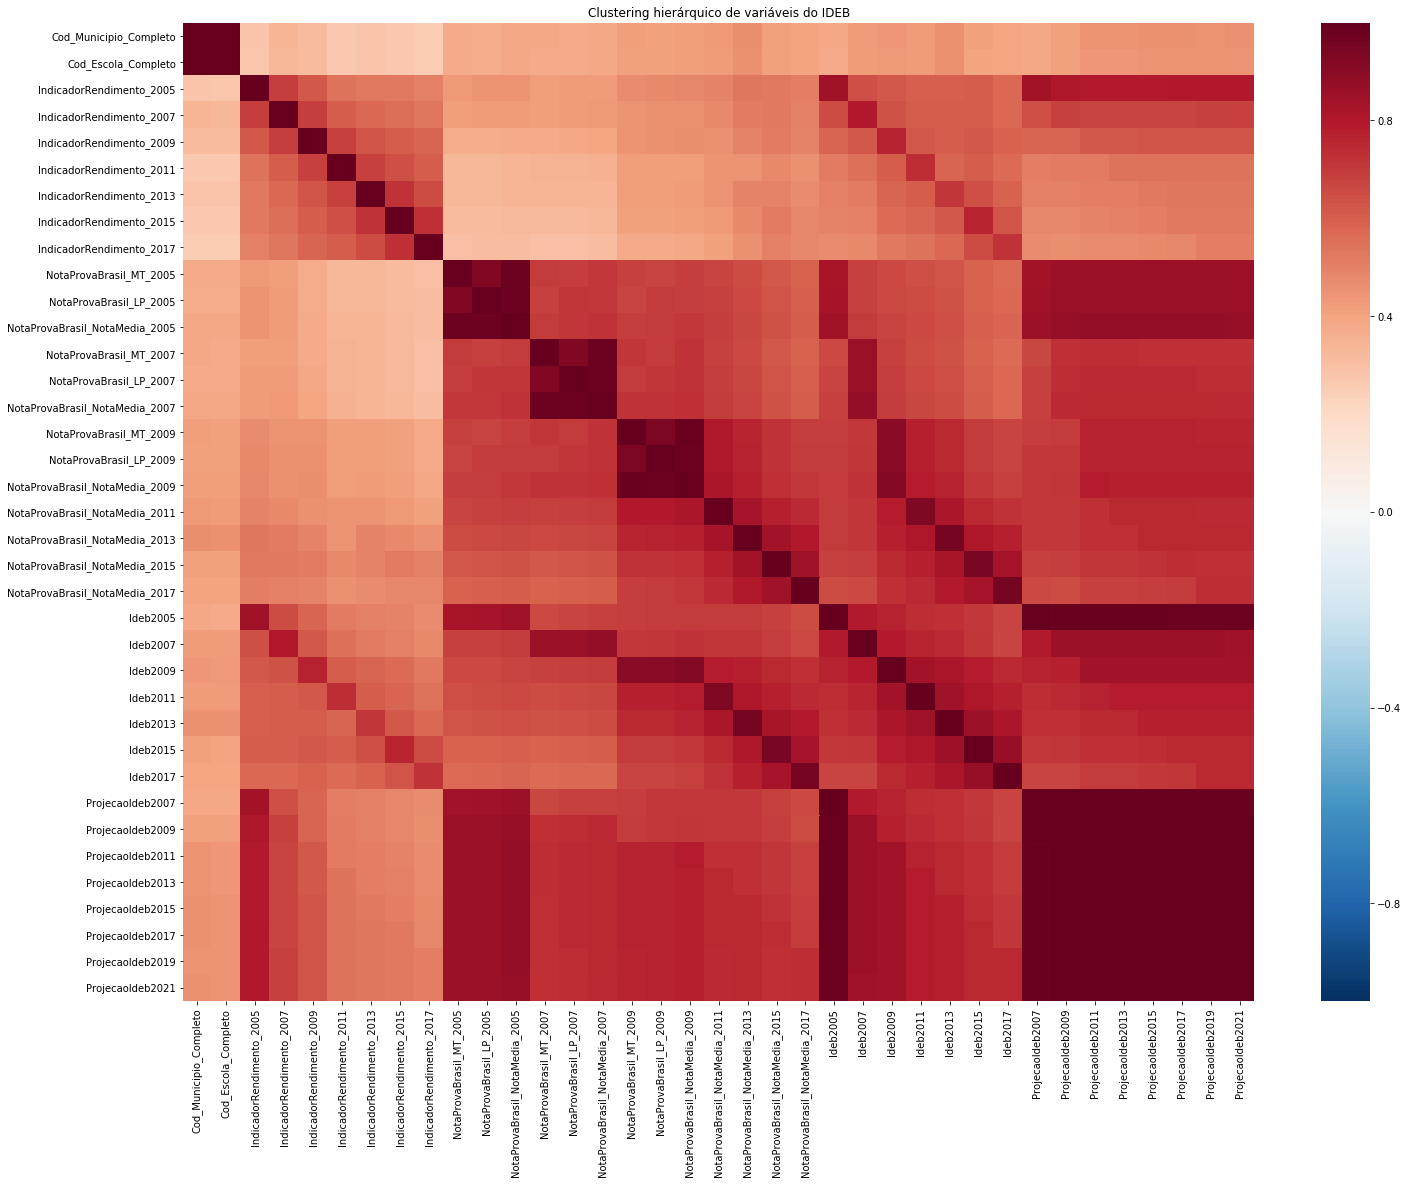

In [8]:
ideb_corr = ideb_anos_iniciais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

### IDEB - Anos Finais

In [9]:
ideb_anos_finais = pd.read_csv('../data/ideb/ideb_escolas_anosfinais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_finais['Cod_Escola_Completo'] = ideb_anos_finais['Cod_Escola_Completo'].astype('int')

/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (60,61,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
ideb_anos_finais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio  Cod_Escola_Completo  \
0    RO               1100015.0  Alta Floresta D'Oeste             11024666   
1    RO               1100015.0  Alta Floresta D'Oeste             11024682   
2    RO               1100015.0  Alta Floresta D'Oeste             11024828   
3    RO               1100015.0  Alta Floresta D'Oeste             11024917   
4    RO               1100015.0  Alta Floresta D'Oeste             11024968   

                              Nome_Escola       Rede  \
0                    EMEIEF BOA ESPERANCA  Municipal   
1             EEEF EURIDICE LOPES PEDROSO   Estadual   
2                  EMEIEF IZIDORO STEDILE  Municipal   
3             EMEIEF JOSE BASILIO DA GAMA  Municipal   
4  EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA   Estadual   

   TaxaAprovacao2005_6ao9ano  TaxaAprovacao2005_6ano  TaxaAprovacao2005_7ano  \
0                        NaN                     NaN                     NaN   
1                       81.0                    75.6                    86.2   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                       78.1                    72.0                    79.1   

   TaxaAprovacao2005_8ano        ...         Ideb2015  Ideb2017  \
0                     NaN        ...              NaN       4.1   
1                    84.5        ...              NaN       NaN   
2                     NaN        ...              NaN       4.8   
3                     NaN        ...              NaN       NaN   
4                    94.0        ...              4.6       5.3   

   ProjecaoIdeb2007  ProjecaoIdeb2009  ProjecaoIdeb2011  ProjecaoIdeb2013  \
0               NaN               NaN               4.3               4.6   
1               3.9               4.1               4.3               4.7   
2               NaN               NaN               2.8               3.1   
3               NaN               NaN               3.6               3.9   
4               3.5               3.7               3.9               4.3   

   ProjecaoIdeb2015  ProjecaoIdeb2017  ProjecaoIdeb2019  ProjecaoIdeb2021  
0               4.9               5.2               5.4               5.7  
1               5.1               5.4               5.6               5.8  
2               3.4               3.7               3.9               4.2  
3               4.2               4.5               4.7               5.0  
4               4.7               5.0               5.2               5.5  

[5 rows x 84 columns]

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')

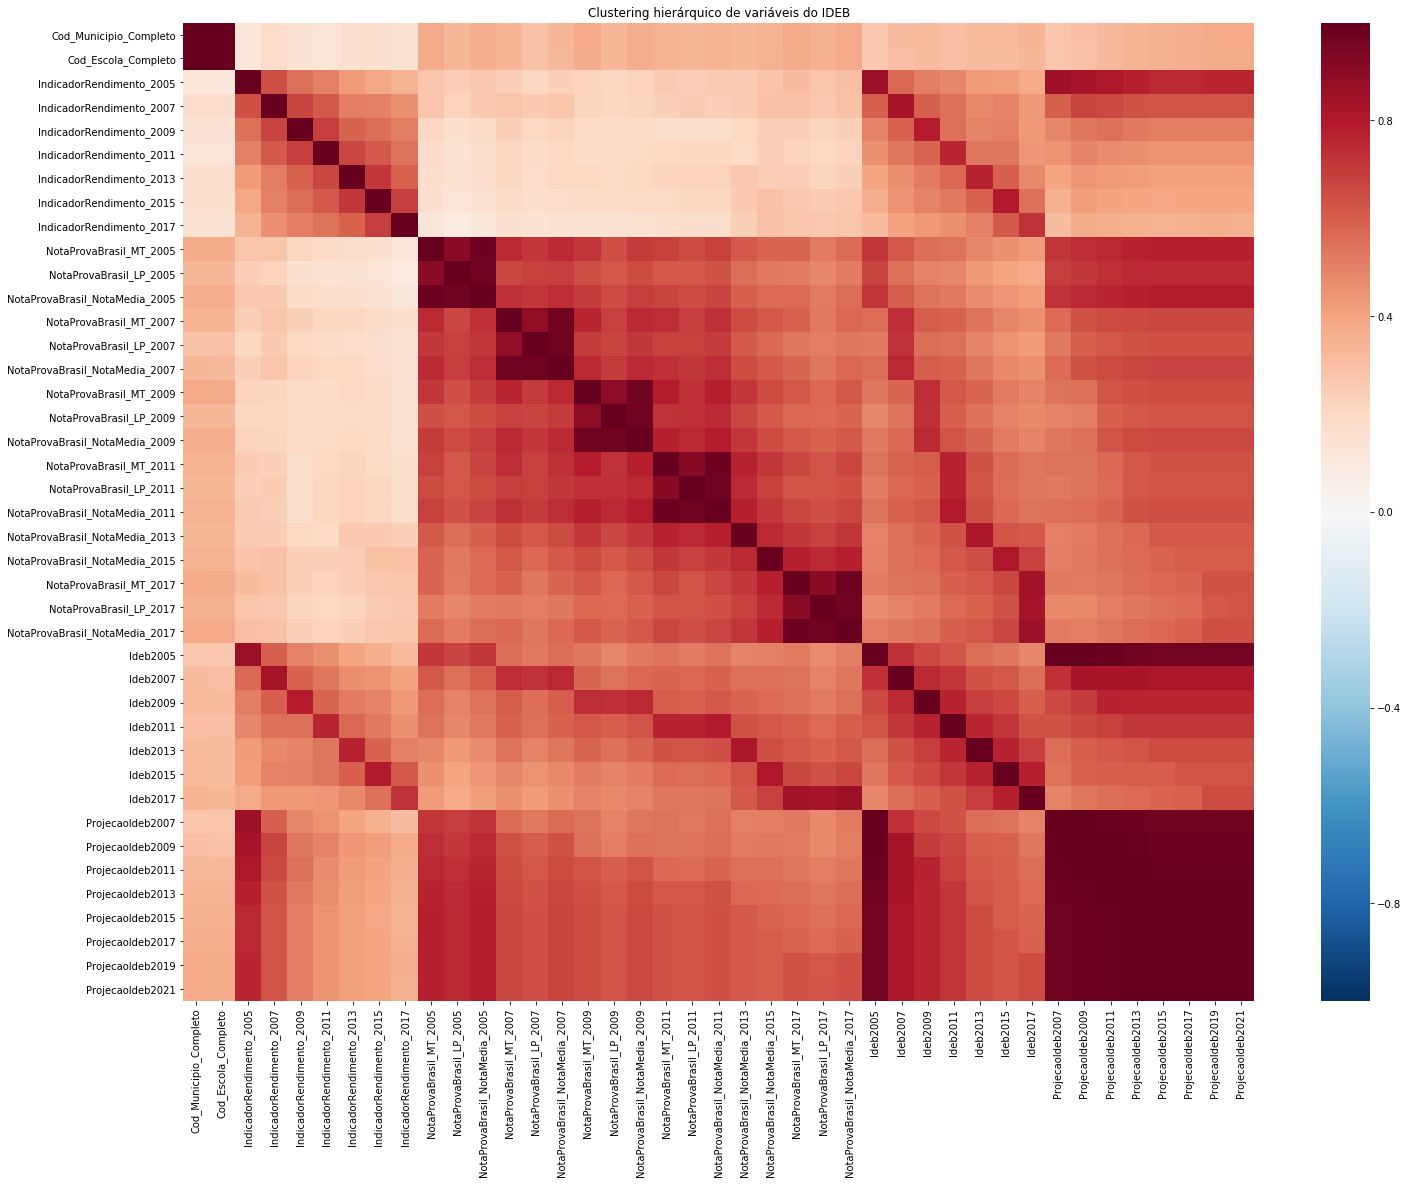

In [11]:
ideb_corr = ideb_anos_finais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

## Escolas 2017 com IDEB

In [23]:
escolas_2017 = pd.read_csv(os.path.join(escolas_path, 'escolas20170101.csv'),
                           dtype=zip_dtype('../schemas/escolas_schema.json'))

/home/joao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,12,52,59,61,63,64,68,69,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,98,99,102,104,105,107,108,113,121,124,125,126,127,128,129,130,136,152,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
escolas_2017.head()
escolas_2017['cod_escola_inep'] = escolas_2017['cod_escola_inep'].astype(np.float64)
#escolas_2017.dtypes

In [54]:
ideb_anos_iniciais.head()
cols_2017 = ideb_anos_iniciais.columns[ideb_anos_iniciais.columns.str.contains(r'2017|Cod_Escola_Completo')]
ideb_anos_iniciais_2017 = ideb_anos_iniciais[cols_2017]

In [55]:
escolas_2017_ideb_iniciais = escolas_2017.merge(ideb_anos_iniciais_2017, left_on='cod_escola_inep', right_on='Cod_Escola_Completo', how='inner')
escolas_2017_ideb_iniciais.head()

Unnamed: 0 ano_censo  cod_escola_inep regiao unidade_federativa  \
0          37      2017       11002441.0  Norte           Rondônia   
1          43      2017       11020512.0  Norte           Rondônia   
2          68      2017       11087811.0  Norte           Rondônia   
3         206      2017       11016329.0  Norte           Rondônia   
4         250      2017       11032030.0  Norte           Rondônia   

          mesoregiao  microregiao            municipio tp_dependencia  \
0    Madeira-Guaporé  Porto Velho          Porto Velho              2   
1  Leste Rondoniense    Ji-Paraná                Urupá              3   
2  Leste Rondoniense    Ji-Paraná  Ouro Preto do Oeste              3   
3  Leste Rondoniense    Ji-Paraná  Ouro Preto do Oeste              3   
4  Leste Rondoniense      Vilhena        Pimenta Bueno              2   

  tp_dependencia_desc        ...        TaxaAprovacao2017_2ano  \
0            Estadual        ...                           NaN   
1           Municipal        ...                           NaN   
2           Municipal        ...                           NaN   
3           Municipal        ...                           NaN   
4            Estadual        ...                           NaN   

  TaxaAprovacao2017_3ano TaxaAprovacao2017_4ano TaxaAprovacao2017_5ano  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

  IndicadorRendimento_2017 NotaProvaBrasil_MT_2017 NotaProvaBrasil_LP_2017  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   NotaProvaBrasil_NotaMedia_2017  Ideb2017  ProjecaoIdeb2017  
0                             NaN       NaN               4.4  
1                             NaN       NaN               6.3  
2                             NaN       NaN               5.4  
3                             NaN       NaN               4.8  
4                             NaN       NaN               5.5  

[5 rows x 216 columns]

In [33]:
escolas_2017_ideb_finais = escolas_2017.merge(ideb_anos_finais, left_on='cod_escola_inep', right_on='Cod_Escola_Completo', how='inner')
escolas_2017_ideb_finais.head()

Unnamed: 0 ano_censo  cod_escola_inep regiao unidade_federativa  \
0          37      2017       11002441.0  Norte           Rondônia   
1          40      2017       11034882.0  Norte           Rondônia   
2         406      2017       11038160.0  Norte           Rondônia   
3         447      2017       11022116.0  Norte           Rondônia   
4         719      2017       11033371.0  Norte           Rondônia   

          mesoregiao        microregiao                 municipio  \
0    Madeira-Guaporé        Porto Velho               Porto Velho   
1  Leste Rondoniense  Colorado do Oeste                Cerejeiras   
2  Leste Rondoniense          Ariquemes               Monte Negro   
3  Leste Rondoniense   Alvorada D'Oeste  Nova Brasilândia D'Oeste   
4  Leste Rondoniense            Vilhena               Chupinguaia   

  tp_dependencia tp_dependencia_desc        ...        Ideb2015 Ideb2017  \
0              2            Estadual        ...             NaN      NaN   
1              3           Municipal        ...             NaN      NaN   
2              3           Municipal        ...             NaN      NaN   
3              3           Municipal        ...             NaN      NaN   
4              2            Estadual        ...             4.3      NaN   

  ProjecaoIdeb2007 ProjecaoIdeb2009 ProjecaoIdeb2011 ProjecaoIdeb2013  \
0              NaN              NaN              3.1              3.4   
1              NaN              NaN              3.5              3.8   
2              NaN              3.9              4.1              4.4   
3              NaN              NaN              3.2              3.5   
4              3.2              3.3              3.6              4.0   

  ProjecaoIdeb2015  ProjecaoIdeb2017  ProjecaoIdeb2019  ProjecaoIdeb2021  
0              3.7               4.0               4.2               4.5  
1              4.2               4.4               4.7               5.0  
2              4.8               5.0               5.3               5.5  
3              3.8               4.1               4.3               4.6  
4              4.4               4.6               4.9               5.2  

[5 rows x 287 columns]

In [18]:
escolas_2017['cod_escola_inep'].sort_values()

115718    11000023
115664    11000040
168982    11000058
343       11000066
790       11000074
168909    11000082
168923    11000104
1281      11000163
168952    11000171
630       11000180
168981    11000198
191175    11000201
1490      11000210
168963    11000244
168980    11000252
191312    11000260
191317    11000295
115814    11000309
115791    11000317
168975    11000325
239       11000341
168969    11000350
191244    11000368
191231    11000376
115800    11000384
1176      11000406
115695    11000422
1481      11000449
115833    11000457
190852    11000465
            ...   
282340    53068181
282131    53068190
282198    53068203
168736    53068211
282108    53068220
282303    53068238
115316    53068246
115474    53068254
96225     53081005
190309    53081013
190249    53081021
190401    53082001
190269    53082010
190235    53082028
96395     53082036
115350    53083008
190299    53083016
96420     53084004
190280    53084012
190270    53084020
190388    53084039
190376    53